In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1. CHARGEMENT ET EXPLORATION DES DONNÉES

In [2]:
df = pd.read_csv('global_climate_events_economic_impact_2020_2025.csv')

print(f"\nDimensions du dataset: {df.shape}")
df.head()


Dimensions du dataset: (3000, 20)


,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0


In [3]:
print(f"\nInformations sur les colonnes:")
print(df.info())


Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   event_id                       3000 non-null   object 
 1   date                           3000 non-null   object 
 2   year                           3000 non-null   int64  
 3   month                          3000 non-null   int64  
 4   country                        3000 non-null   object 
 5   event_type                     3000 non-null   object 
 6   severity                       3000 non-null   int64  
 7   duration_days                  3000 non-null   int64  
 8   affected_population            3000 non-null   int64  
 9   deaths                         3000 non-null   int64  
 10  injuries                       3000 non-null   int64  
 11  economic_impact_million_usd    3000 non-null   float64
 12  infrastructure_d

In [4]:
print(f"\nStatistiques descriptives:")
print(df.describe())


Statistiques descriptives:
              year        month     severity  duration_days  \
count  3000.000000  3000.000000  3000.000000    3000.000000   
mean   2022.401667     6.260333     3.786333       8.783000   
std       1.653857     3.367146     2.005165      14.714508   
min    2020.000000     1.000000     1.000000       0.000000   
25%    2021.000000     3.000000     2.000000       1.000000   
50%    2022.000000     6.000000     4.000000       2.000000   
75%    2024.000000     9.000000     5.000000       9.000000   
max    2025.000000    12.000000     9.000000     115.000000   

       affected_population       deaths     injuries  \
count         3.000000e+03  3000.000000  3000.000000   
mean          8.685505e+05     4.615000    39.228333   
std           3.009690e+06    11.021491    78.812194   
min           6.220000e+02     0.000000     0.000000   
25%           5.451775e+04     1.000000    10.000000   
50%           1.784770e+05     2.000000    18.000000   
75%         

In [5]:
print(f"\nValeurs manquantes:")
print(df.isnull().sum())


Valeurs manquantes:
event_id                         0
date                             0
year                             0
month                            0
country                          0
event_type                       0
severity                         0
duration_days                    0
affected_population              0
deaths                           0
injuries                         0
economic_impact_million_usd      0
infrastructure_damage_score      0
response_time_hours              0
international_aid_million_usd    0
latitude                         0
longitude                        0
total_casualties                 0
impact_per_capita                0
aid_percentage                   0
dtype: int64


In [6]:
print(f"\nTypes d'événements uniques:")
print(df['event_type'].value_counts())


Types d'événements uniques:
event_type
Earthquake           287
Landslide            275
Drought              262
Volcanic Eruption    261
Hurricane            252
Hailstorm            248
Tsunami              247
Cold Wave            238
Wildfire             237
Tornado              237
Heatwave             235
Flood                221
Name: count, dtype: int64


### 2. PREPROCESSING DES DONNÉES

In [7]:
df_processed = df.copy()
df_processed

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,injuries,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,2,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,10,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,9,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,37,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,27,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EV00053,2025-09-10,2025,9,Germany,Earthquake,3,1,587081,1,8,0.67,11.0,10,0.0,-85.3844,-57.1508,9,1.14,0.0
2996,EV00349,2025-09-12,2025,9,Peru,Hurricane,4,1,479652,2,23,0.03,6.8,0,0.0,-18.2696,-173.0978,25,0.06,0.0
2997,EV01781,2025-09-13,2025,9,Nigeria,Cold Wave,2,22,2127579,2,10,0.73,16.2,16,0.0,78.4899,120.1220,12,0.34,0.0
2998,EV00680,2025-09-14,2025,9,Indonesia,Drought,3,55,1817931,2,21,2.89,6.4,14,0.0,70.2013,12.7431,23,1.59,0.0


In [8]:
df.nunique()

event_id                         3000
date                             1596
year                                6
month                              12
country                            51
event_type                         12
severity                            9
duration_days                      88
affected_population              2994
deaths                             79
injuries                          268
economic_impact_million_usd       504
infrastructure_damage_score       483
response_time_hours                54
international_aid_million_usd       3
latitude                         2997
longitude                        2998
total_casualties                  270
impact_per_capita                 791
aid_percentage                      3
dtype: int64

In [9]:
# 2.1 Conversion de la date
df_processed['date'] = pd.to_datetime(df_processed['date'])
df_processed['day_of_year'] = df_processed['date'].dt.dayofyear
df_processed

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,...,economic_impact_million_usd,infrastructure_damage_score,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage,day_of_year
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,...,0.01,4.9,11,0.0,85.4321,138.7206,2,0.02,0.0,1
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,...,0.00,3.4,5,0.0,-32.0370,14.0111,11,0.00,0.0,1
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,...,0.10,8.9,10,0.0,78.4213,-112.7556,9,0.83,0.0,2
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,...,1.27,17.8,7,0.0,73.6564,115.0650,39,6.85,0.0,2
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,...,2.01,18.7,17,0.0,52.6458,101.5023,29,11.38,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EV00053,2025-09-10,2025,9,Germany,Earthquake,3,1,587081,1,...,0.67,11.0,10,0.0,-85.3844,-57.1508,9,1.14,0.0,253
2996,EV00349,2025-09-12,2025,9,Peru,Hurricane,4,1,479652,2,...,0.03,6.8,0,0.0,-18.2696,-173.0978,25,0.06,0.0,255
2997,EV01781,2025-09-13,2025,9,Nigeria,Cold Wave,2,22,2127579,2,...,0.73,16.2,16,0.0,78.4899,120.1220,12,0.34,0.0,256
2998,EV00680,2025-09-14,2025,9,Indonesia,Drought,3,55,1817931,2,...,2.89,6.4,14,0.0,70.2013,12.7431,23,1.59,0.0,257


In [ ]:
le_country = LabelEncoder()
le_event = LabelEncoder()

df_processed['country_encoded'] = le_country.fit_transform(df_processed['country'])
df_processed['event_type_encoded'] = le_event.fit_transform(df_processed['event_type'])
df_processed

,event_id,date,year,month,country,event_type,severity,duration_days,affected_population,deaths,...,response_time_hours,international_aid_million_usd,latitude,longitude,total_casualties,impact_per_capita,aid_percentage,day_of_year,country_encoded,event_type_encoded
0,EV01539,2020-01-01,2020,1,Japan,Tsunami,1,1,420956,0,...,11,0.0,85.4321,138.7206,2,0.02,0.0,1,24,9
1,EV02303,2020-01-01,2020,1,Qatar,Hurricane,1,4,3276,1,...,5,0.0,-32.0370,14.0111,11,0.00,0.0,1,36,6
2,EV01796,2020-01-02,2020,1,Canada,Drought,3,6,120382,0,...,10,0.0,78.4213,-112.7556,9,0.83,0.0,2,6,1
3,EV00175,2020-01-02,2020,1,Poland,Heatwave,6,16,185527,2,...,7,0.0,73.6564,115.0650,39,6.85,0.0,2,34,5
4,EV01115,2020-01-03,2020,1,UAE,Wildfire,4,16,176642,2,...,17,0.0,52.6458,101.5023,29,11.38,0.0,3,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EV00053,2025-09-10,2025,9,Germany,Earthquake,3,1,587081,1,...,10,0.0,-85.3844,-57.1508,9,1.14,0.0,253,15,2
2996,EV00349,2025-09-12,2025,9,Peru,Hurricane,4,1,479652,2,...,0,0.0,-18.2696,-173.0978,25,0.06,0.0,255,32,6
2997,EV01781,2025-09-13,2025,9,Nigeria,Cold Wave,2,22,2127579,2,...,16,0.0,78.4899,120.1220,12,0.34,0.0,256,30,0
2998,EV00680,2025-09-14,2025,9,Indonesia,Drought,3,55,1817931,2,...,14,0.0,70.2013,12.7431,23,1.59,0.0,257,19,1



Distribution des décès avant traitement:
count    3000.000000
mean        4.615000
std        11.021491
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       117.000000
Name: deaths, dtype: float64

Corrélations avec 'deaths':
deaths                         1.000000
injuries                       0.606400
severity                       0.539854
infrastructure_damage_score    0.378720
affected_population            0.086869
economic_impact_million_usd    0.079936
duration_days                  0.062756
response_time_hours            0.010207
Name: deaths, dtype: float64


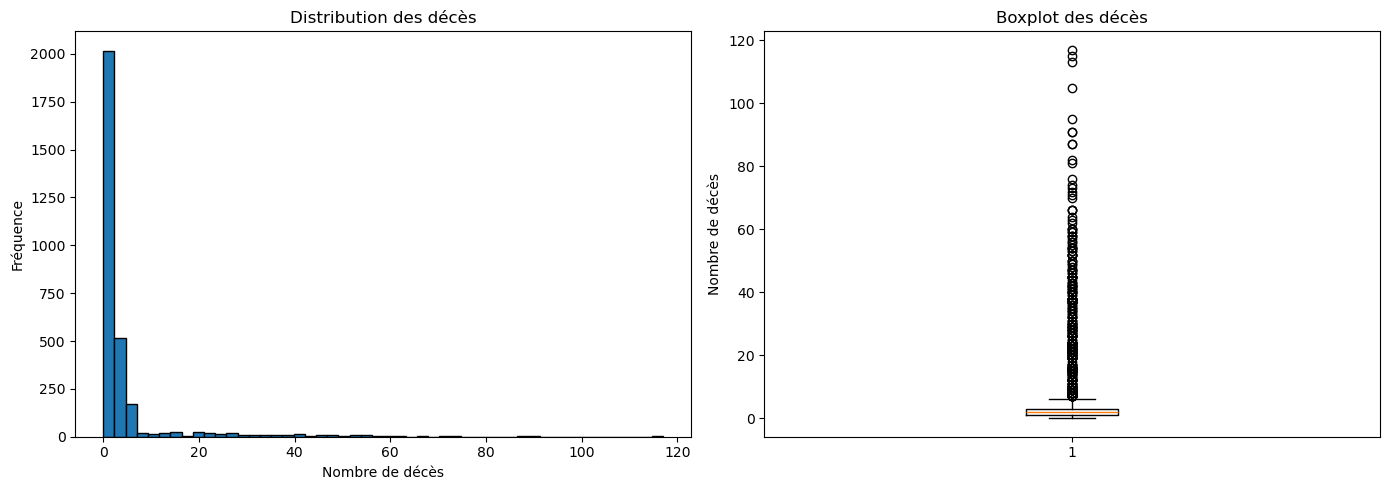

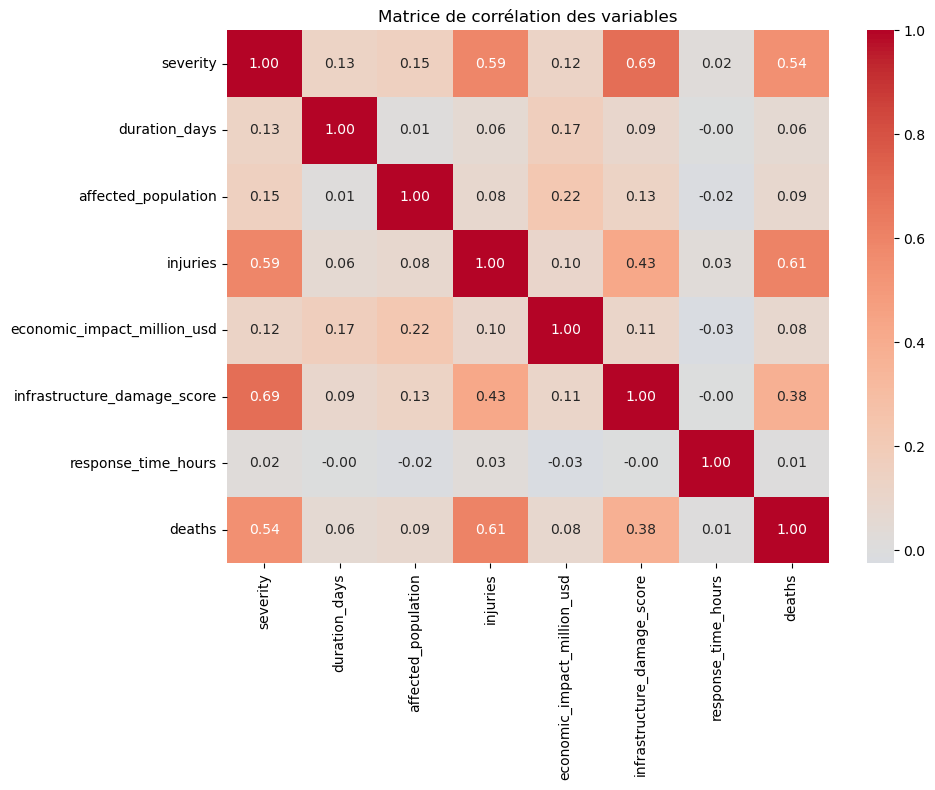

In [ ]:
print("\nDistribution des décès avant traitement:")
print(df_processed['deaths'].describe())

# Visualisation de la distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_processed['deaths'], bins=50, edgecolor='black')
axes[0].set_xlabel('Nombre de décès')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des décès')

axes[1].boxplot(df_processed['deaths'])
axes[1].set_ylabel('Nombre de décès')
axes[1].set_title('Boxplot des décès')
plt.tight_layout()

# 2.5 Analyse de corrélation
correlation_features = ['severity', 'duration_days', 'affected_population', 'injuries',
                        'economic_impact_million_usd', 'infrastructure_damage_score',
                        'response_time_hours', 'deaths']

correlation_matrix = df_processed[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation des variables')
plt.tight_layout()

print(f"\nCorrélations avec 'deaths':")
print(correlation_matrix['deaths'].sort_values(ascending=False))



### 3. PRÉPARATION DES DONNÉES POUR LE MACHINE LEARNING

In [15]:
features = ['severity', 'duration_days', 'affected_population', 'injuries',
            'economic_impact_million_usd', 'infrastructure_damage_score',
            'response_time_hours', 'event_type_encoded', 'month']

X = df_processed[features]
y = df_processed['deaths']

print(f"\nFeatures sélectionnées: {features}")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTaille ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Taille ensemble de test: {X_test.shape[0]} échantillons")

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features sélectionnées: ['severity', 'duration_days', 'affected_population', 'injuries', 'economic_impact_million_usd', 'infrastructure_damage_score', 'response_time_hours', 'event_type_encoded', 'month']
Shape de X: (3000, 9)
Shape de y: (3000,)

Taille ensemble d'entraînement: 2400 échantillons
Taille ensemble de test: 600 échantillons


### 4. MODÈLE 1: RÉGRESSION LINÉAIRE MULTIPLE


Performances du modèle de Régression Linéaire:
------------------------------------------------------------
R² Score (Train): 0.4270
R² Score (Test):  0.3638
RMSE (Train):     8.5422
RMSE (Test):      7.8818
MAE (Train):      3.8970
MAE (Test):       3.9982


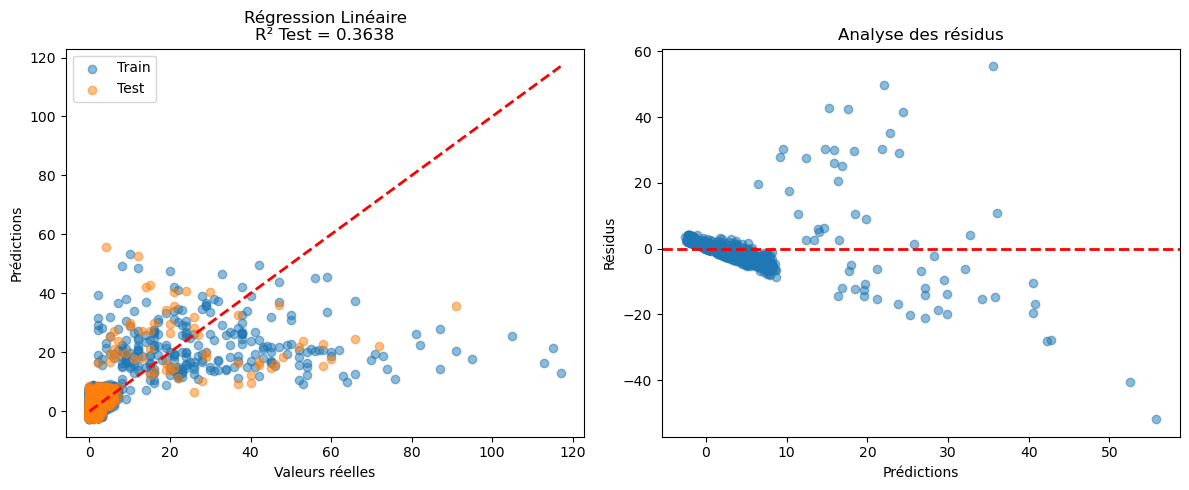

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)


lr_train_r2 = r2_score(y_train, y_pred_train_lr)
lr_test_r2 = r2_score(y_test, y_pred_test_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
lr_train_mae = mean_absolute_error(y_train, y_pred_train_lr)
lr_test_mae = mean_absolute_error(y_test, y_pred_test_lr)

print("\nPerformances du modèle de Régression Linéaire:")
print("-" * 60)
print(f"R² Score (Train): {lr_train_r2:.4f}")
print(f"R² Score (Test):  {lr_test_r2:.4f}")
print(f"RMSE (Train):     {lr_train_rmse:.4f}")
print(f"RMSE (Test):      {lr_test_rmse:.4f}")
print(f"MAE (Train):      {lr_train_mae:.4f}")
print(f"MAE (Test):       {lr_test_mae:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_lr, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title(f'Régression Linéaire\nR² Test = {lr_test_r2:.4f}')
plt.legend()

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_test_lr
plt.scatter(y_pred_test_lr, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')

plt.tight_layout()

### 5. MODÈLE 2: RANDOM FOREST REGRESSOR


Performances du modèle Random Forest:
------------------------------------------------------------
R² Score (Train): 0.8758
R² Score (Test):  0.5538
RMSE (Train):     3.9774
RMSE (Test):      6.6009
MAE (Train):      1.6183
MAE (Test):       2.6357


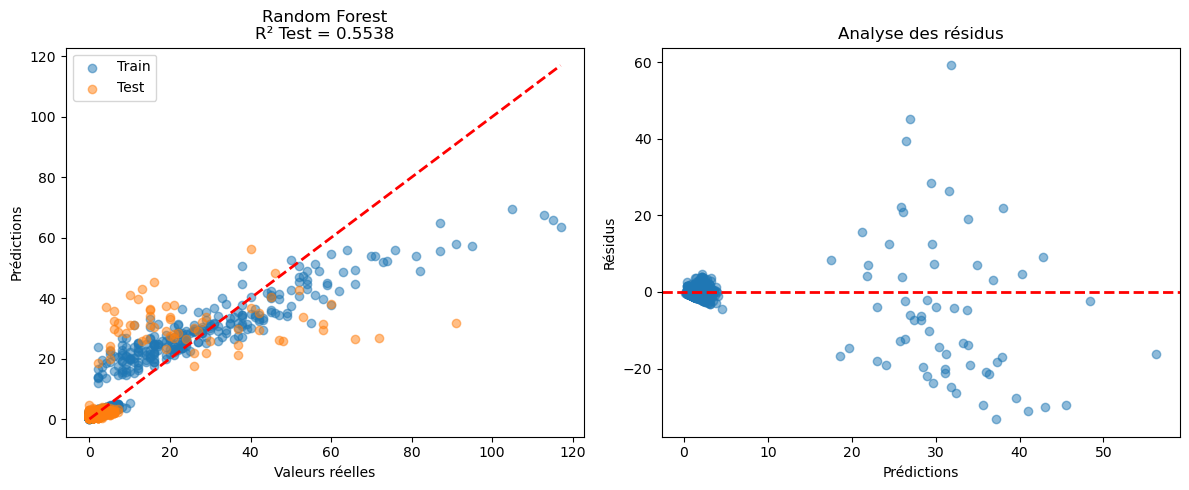

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, 
                                 min_samples_split=5, min_samples_leaf=2,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

rf_train_r2 = r2_score(y_train, y_pred_train_rf)
rf_test_r2 = r2_score(y_test, y_pred_test_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
rf_train_mae = mean_absolute_error(y_train, y_pred_train_rf)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)

print("\nPerformances du modèle Random Forest:")
print("-" * 60)
print(f"R² Score (Train): {rf_train_r2:.4f}")
print(f"R² Score (Test):  {rf_test_r2:.4f}")
print(f"RMSE (Train):     {rf_train_rmse:.4f}")
print(f"RMSE (Test):      {rf_test_rmse:.4f}")
print(f"MAE (Train):      {rf_train_mae:.4f}")
print(f"MAE (Test):       {rf_test_mae:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_rf, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test_rf, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title(f'Random Forest\nR² Test = {rf_test_r2:.4f}')
plt.legend()

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_test_rf
plt.scatter(y_pred_test_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')

plt.tight_layout()

### 6. COMPARAISON DES MODÈLES

In [19]:
comparison = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Random Forest'],
    'R² Train': [lr_train_r2, rf_train_r2],
    'R² Test': [lr_test_r2, rf_test_r2],
    'RMSE Train': [lr_train_rmse, rf_train_rmse],
    'RMSE Test': [lr_test_rmse, rf_test_rmse],
    'MAE Train': [lr_train_mae, rf_train_mae],
    'MAE Test': [lr_test_mae, rf_test_mae]
})

print("\nTableau comparatif:")
print(comparison.to_string(index=False))



Tableau comparatif:
             Modèle  R² Train  R² Test  RMSE Train  RMSE Test  MAE Train  MAE Test
Régression Linéaire  0.426983 0.363805    8.542188   7.881759   3.897000  3.998180
      Random Forest  0.875770 0.553772    3.977389   6.600946   1.618264  2.635714


### 7. PRÉDICTIONS PAR TYPE D'ÉVÉNEMENT

In [20]:
df_results = df_processed.iloc[X_test.index].copy()
df_results['deaths_real'] = y_test.values
df_results['deaths_pred_lr'] = y_pred_test_lr
df_results['deaths_pred_rf'] = y_pred_test_rf

event_analysis = df_results.groupby('event_type').agg({
    'deaths_real': ['mean', 'std', 'count'],
    'deaths_pred_lr': 'mean',
    'deaths_pred_rf': 'mean'
}).round(2)

print("\nMoyenne des décès par type d'événement:")
print(event_analysis)


Moyenne des décès par type d'événement:
                  deaths_real              deaths_pred_lr deaths_pred_rf
                         mean    std count           mean           mean
event_type                                                              
Cold Wave                7.78  14.81    50           7.78           7.59
Drought                  8.51  17.69    53           6.49           7.89
Earthquake               1.30   1.40    66           1.55           1.36
Flood                    5.37  10.76    46           6.86           5.69
Hailstorm                5.52   9.21    46           7.45           7.32
Heatwave                 6.83  11.85    47           6.54           8.14
Hurricane                1.22   1.44    63           0.49           1.10
Landslide                3.76   7.77    46           6.55           4.89
Tornado                  4.66  10.51    47           5.55           5.55
Tsunami                  1.30   1.30    47           0.31           1.17
Volcanic E

In [21]:
print("\n✅ Meilleur modèle:", "Random Forest" if rf_test_r2 > lr_test_r2 else "Régression Linéaire")
print(f"   R² Score: {max(rf_test_r2, lr_test_r2):.4f}")


✅ Meilleur modèle: Random Forest
   R² Score: 0.5538
